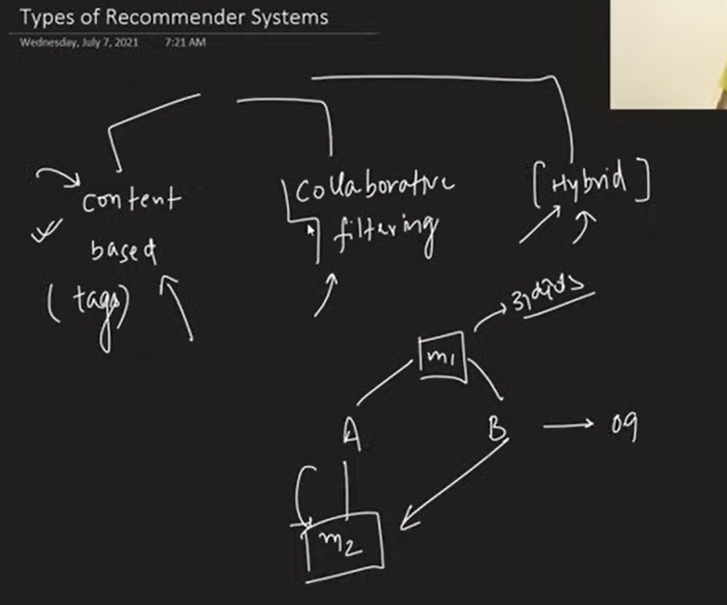

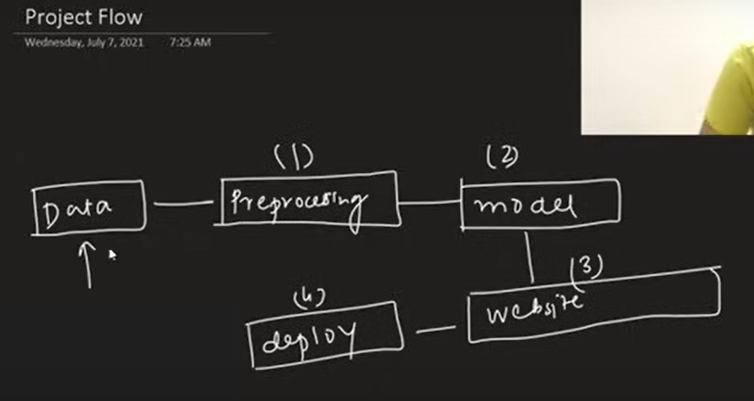

In [188]:
import numpy as np
import pandas as pd

In [189]:
movies=pd.read_csv("tmdb_5000_movies.csv")
credits=pd.read_csv("tmdb_5000_credits.csv")

In [190]:
movies.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
866,55000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,70074,[],en,Bullet to the Head,"After watching their respective partners die, ...",22.503935,"[{""name"": ""Dark Castle Entertainment"", ""id"": 1...","[{""iso_3166_1"": ""CH"", ""name"": ""Switzerland""}, ...",2013-01-31,9489829,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Revenge Never Gets Old.,Bullet to the Head,5.2,481


In [191]:
credits.sample(1)

,movie_id,title,cast,crew
1382,1273,TMNT,"[{""cast_id"": 8, ""character"": ""Casey Jones (voi...","[{""credit_id"": ""52fe42ecc3a36847f802d3db"", ""de..."


In [192]:
credits.head(1)["cast"].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

### Merging the datasets based on their Title

In [193]:
movies=movies.merge(credits,on="title")

Which columns to keep?

In [194]:
#genres
#id (for posters when deploying in web)
#keywords
#titles (original titles may include hindi/french etc languages titles)
#overview
#cast
#crew (christophar nolan examples)
movies=movies[['genres','movie_id','keywords','title','overview','cast','crew']]

In [195]:
movies.isnull().sum()

genres      0
movie_id    0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [196]:
movies.dropna(inplace=True)

In [197]:
movies.duplicated().sum()

np.int64(0)

In [198]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [199]:
import ast   # to convert string of list into list
def converter(obj):  #gets a string as imput argument
    A=[]
    for i in ast.literal_eval(obj): #converts the string into list
        A.append(i['name'])
    return A #return will be outside for loop

In [200]:
movies['genres']=movies['genres'].apply(converter) #.apply() is used to apply a function to each element in the column.

In [201]:
movies['keywords']=movies['keywords'].apply(converter)
movies['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4806, dtype: object

#### Handling 'cast' column

In [202]:
def converter2(obj):  #gets a string as imput argument
    A=[]
    counter=0
    for i in ast.literal_eval(obj): #converts the string into list
        if counter!=3:
            A.append(i['name'])
            counter+=1
        else:
            break
    return A #return will be outside for loop

In [203]:
movies['cast']=movies['cast'].apply(converter2)

In [204]:
movies['cast'] ##uper wla for loop nichy wli har list k liay chal rha ha or for each caste of a movie


0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

#### Handling 'crew' column

In [205]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [206]:
def fetch_director(obj):
    B=[]
    for i in ast.literal_eval(obj):
        if i['job']== "Director":
            B.append(i['name'])
    return B

In [207]:
movies['crew']=movies['crew'].apply(fetch_director)

In [208]:
# text = "Hello world"
# words = text.split()
# output --> ['Hello', 'world']

In [209]:
movies['overview']=movies['overview'].apply(lambda x:x.split())  # converting string to list to concatenate with other lists

In [210]:
movies.head()

,genres,movie_id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


#### Now we will apply transformation to remove spaces between words (so our model desn't get confused)

In [211]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [212]:
movies.head()

,genres,movie_id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


#### Joining the columns to creat Tags

In [213]:
movies['tag']=movies['overview']+movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies['tag']

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: tag, Length: 4806, dtype: object

In [214]:
movies.head()

,genres,movie_id,keywords,title,overview,cast,crew,tag
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


#### Now the required columns are reduced

In [215]:
new_movies=movies[['movie_id','title','tag']]

In [216]:
new_movies

,movie_id,title,tag
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


#### Now convertin the 'lists' in Tag to 'strings'

In [217]:
new_movies['tag']=movies['tag'].apply(lambda x:" ".join(x))
#The .join(x) method in Python is a string method used to concatenate elements of an iterable (like a list, tuple, or set) into a single string. 
# The string on which .join() is called acts as the separator between the elements of the iterable 
# separator.join(iterable)
#list ky har element ma " " insert hga
# is a string method and applied to lists,tupples etc

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22404\1266632016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tag']=movies['tag'].apply(lambda x:" ".join(x))


In [218]:
new_movies['tag'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

Converting the strings into lower case

In [219]:
new_movies['tag']=new_movies['tag'].apply(lambda x:x.lower())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22404\2273915133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tag']=new_movies['tag'].apply(lambda x:x.lower())


### Vectorization

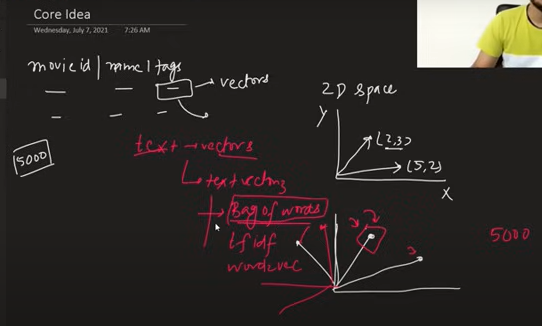

Converting each movie into a vector\
We'll use bagging

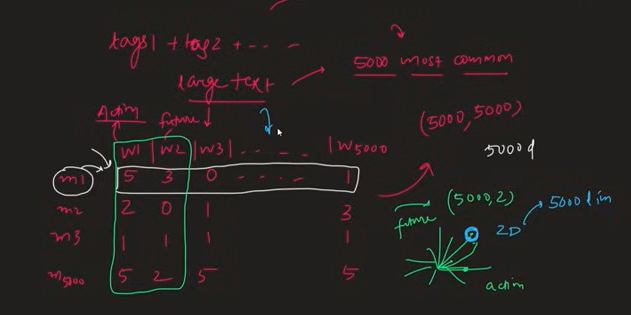

We'll not use stop words (and,are,from)

In [220]:
from sklearn.feature_extraction.text import CountVectorizer

In [221]:
cv= CountVectorizer(max_features=5000,stop_words='english')
vectors=cv.fit_transform(new_movies['tag']).toarray()
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], shape=(5000,))

Each vector means one movie

In [222]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      shape=(5000,), dtype=object)

Apply Stemming

In [223]:
import nltk

In [224]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [225]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [226]:
new_movies['tag']=new_movies['tag'].apply(stem)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22404\1472348809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tag']=new_movies['tag'].apply(stem)


In [227]:
cv= CountVectorizer(max_features=5000,stop_words='english')
vectors=cv.fit_transform(new_movies['tag']).toarray()
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      shape=(5000,), dtype=object)

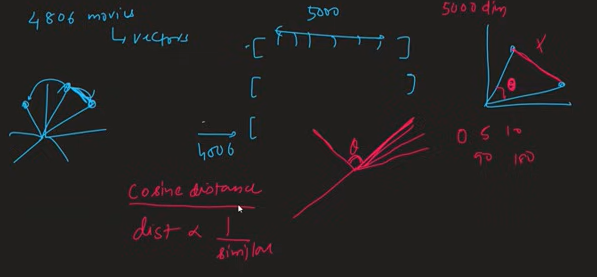

Euclidean distance fails as dimensions increases\
so we will use cosine disance (anngle between 2 vectors)

In [228]:
from sklearn.metrics.pairwise import cosine_similarity

In [229]:
similarity=cosine_similarity(vectors)

In [230]:
similarity[0] #tell us abpout the similarity(angle) of 1st movie with itself and other 4805 movies)

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ], shape=(4806,))

In [231]:
new_movies[new_movies['title']=="Batman Begins"].index[0]

np.int64(119)

In [232]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6] #reverse and key are parameters of sorted

[(1214, np.float64(0.28676966733820225)),
 (2405, np.float64(0.26901379342448517)),
 (3728, np.float64(0.2605130246476754)),
 (507, np.float64(0.255608593705383)),
 (539, np.float64(0.25038669783359574))]

In [233]:
def recommend(movie):
    movie_index=new_movies[new_movies['title']==movie].index[0]
    distances=similarity[movie_index] #this gives distance or similarity of given movie name to all other movies
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    for i in movies_list:
        print(new_movies.iloc[i[0]].title)

In [238]:
recommend("Batman Begins")

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf
